<a href="https://colab.research.google.com/github/Metallicode/Math/blob/main/Random_Forests_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The Benefits Of Ensemble Methods Like Random Forests Vs Decision Trees

Decision trees are a powerful and intuitive modeling technique, but they have some shortcomings. When we contrast them with the Random Forests approach, we can highlight the benefits of ensemble methods like Random Forests. Here's a rundown of the problems with simple decision trees:

* Overfitting: The biggest problem with decision trees is their tendency to overfit, especially when the tree is deep. A tree that is grown too deep will learn the training data perfectly, including its noise and outliers, and will perform poorly on unseen data.

* High Variance: Small changes in the data can result in a very different structure for a decision tree. This is termed as high variance, and it means the model can be unstable and sensitive to the randomness in the training data.

* Suboptimal Solutions: The greedy nature of the decision tree building process (i.e., making the best decision at the current step without considering future steps) can lead to locally optimal solutions that aren't globally optimal.

* Bias with Imbalanced Datasets: Decision trees can be biased if one class dominates the dataset. The dominant class might be favored, leading to imbalanced classification.

* Complex Trees: Trees that are deep can become complex and harder to interpret. This negates one of the primary benefits of decision trees, which is their intuitive, human-readable structure.

* Difficulty with Some Types of Data: Decision trees might struggle with XOR-like problems or problems with complex boundary conditions unless they are deep, which again risks overfitting.



**Random Forests address many of these problems:**

* Reduction in Overfitting: By averaging the results of multiple trees, Random Forests tend to generalize better and reduce the risk of overfitting.

* Decreased Variance: Since Random Forests average multiple trees, the overall model is less sensitive to the fluctuations and randomness of any single tree, leading to a more robust and stable model.

* Handles Imbalance: The bootstrapping technique in Random Forests can help in scenarios with imbalanced datasets, ensuring that each bootstrap sample has a more balanced representation of classes.

* Improved Accuracy: Random Forests often have better accuracy than individual trees because they capture the wisdom of the "crowd" of trees.

* Feature Randomness: By considering only a subset of features at each split, Random Forests ensure that individual trees aren't overly reliant on a few dominant features, leading to more diverse trees.

In essence, while a single decision tree has its strengths in interpretability and simplicity, it suffers from overfitting, high variance, and other issues. Random Forests, an ensemble method, leverage the strength of multiple trees to address many of these issues, leading to a more accurate and robust model.

#Random Forests

Random Forests are a popular ensemble learning method primarily used for classification (and regression) tasks. Here are the key features and aspects you should know about Random Forests:

* Ensemble Method: Random Forests work by aggregating the results from a collection of decision trees. The idea is that by combining multiple models, the ensemble acts more robustly and accurately than any individual tree.

* Bootstrapping: For each tree in the forest, a random subset of the data is selected with replacement (bootstrapping). This means some samples may be used multiple times, while others may not be used at all. This method introduces randomness and reduces the variance of the model.

* Feature Randomness: During the splitting process, instead of finding the best split among all features, Random Forests select the best split among a random subset of features. This ensures that trees are not just exploiting a few strong features and become diverse in their decision-making.

* Reduction in Overfitting: Because of the randomness introduced in tree-building and the ensemble nature of the model, Random Forests tend to overfit less than individual decision trees.

* Parallel Training: Since each tree is built independently, the process can easily be parallelized, making Random Forests relatively fast to train on large datasets or on systems with multiple cores.

* Handling Missing Data: Random Forests can handle missing values. During training, if a feature has missing values, the model can continue with the splitting process. During prediction, for trees that encounter missing features, the prediction is made using both the left and right child nodes and results are aggregated.

* Importance Scores: Random Forests can rank features based on their importance in making accurate predictions. This can be very useful for feature selection and understanding the model's decision-making process.

* Versatility: Random Forests can be used for both classification and regression tasks.

* Out-of-Bag (OOB) Error: Since each tree is trained on a subset of the data, a portion of the training data (the out-of-bag samples) is not used to train that tree. This data can be used as a validation set, and the average error on these out-of-bag samples can be used as an estimate of the model's generalization error.

* Minimal Pre-processing: Random Forests require minimal data pre-processing. They can handle categorical variables without one-hot encoding, and feature scaling is generally not needed.

When learning about Random Forests, it's essential to understand both the intuition behind ensemble methods and the technical details of how trees are constructed. Experimenting with different parameters, like the number of trees, the maximum depth of the trees, and the number of features considered for splitting, can help you get a feel for how Random Forests behave in practice.

## Bagging (Bootstrap Aggregating):

Random Forests utilize bootstrapping as part of a broader procedure called bagging. Here's how it works:

A sample of the training data is drawn with replacement. This sample is typically the same size as the original dataset, but due to the sampling with replacement, some observations may be repeated in the sample while others might not appear at all.
A decision tree is grown using this bootstrap sample.
This process is repeated many times, producing a 'forest' of trees.

#Random Forests with sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("penguins_size.csv")
df

###Fix DataSet

In [10]:
df=df.dropna()

In [11]:
df=df.drop(index=df[df["sex"]=="."].index, axis=0)

In [12]:
y = df["species"]

In [13]:
X = df.drop("species", axis=1)

In [14]:
X = pd.get_dummies(X, drop_first=True)

In [15]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


###Train/Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [ ]:
help(train_test_split)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

###Scale

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [24]:
scaler.fit(X_train)

StandardScaler()

In [25]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

#RandomForestClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
#n_estimators <--- How many trees
#max_features <--- how many features are selected for each split

model = RandomForestClassifier(n_estimators=10,
                               max_features="auto",
                               random_state=42)

In [29]:
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=10, random_state=42)

In [30]:
y_preds = model.predict(X_test_scaled)

###Evaluate

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
confusion_matrix(y_test, y_preds)

array([[51,  1,  0],
       [ 1, 19,  0],
       [ 0,  1, 37]])

In [33]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        52
   Chinstrap       0.90      0.95      0.93        20
      Gentoo       1.00      0.97      0.99        38

    accuracy                           0.97       110
   macro avg       0.96      0.97      0.96       110
weighted avg       0.97      0.97      0.97       110



##Random Forests GridSearchCV

In [34]:
from sklearn.model_selection import GridSearchCV

In [37]:
estimators = [5,10,20,50,100]
maxfeatures = [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [38]:
gs_params = {"n_estimators":estimators,
             "max_features":maxfeatures,
             "bootstrap":bootstrap,
             "oob_score":oob_score}

In [ ]:
help(RandomForestClassifier)

In [39]:
model = RandomForestClassifier()
grid_model = GridSearchCV(model, gs_params)

In [ ]:
grid_model.fit(X_train_scaled, y_train)

In [41]:
grid_model.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 20, 'oob_score': False}

In [42]:
final_model = RandomForestClassifier(bootstrap=True,max_features=2,
                                     n_estimators=20,oob_score=False)

In [43]:
final_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_features=2, n_estimators=20)

In [44]:
final_y_preds = final_model.predict(X_test_scaled)

In [46]:
print(classification_report(y_test, final_y_preds))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        52
   Chinstrap       0.95      0.95      0.95        20
      Gentoo       1.00      1.00      1.00        38

    accuracy                           0.98       110
   macro avg       0.98      0.98      0.98       110
weighted avg       0.98      0.98      0.98       110



In [47]:
confusion_matrix(y_test, final_y_preds)

array([[51,  1,  0],
       [ 1, 19,  0],
       [ 0,  0, 38]])

##Plotting The Benefit of Adding Trees

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
errors=[]
mis_class=[]


for i in range(1,100):
  test_model = RandomForestClassifier(n_estimators=i)
  test_model.fit(X_train_scaled, y_train)
  test_preds = test_model.predict(X_test_scaled)
  err = 1 - accuracy_score(y_test, test_preds)
  miss = np.sum(y_test!=test_preds)
  errors.append(err)
  mis_class.append(miss)



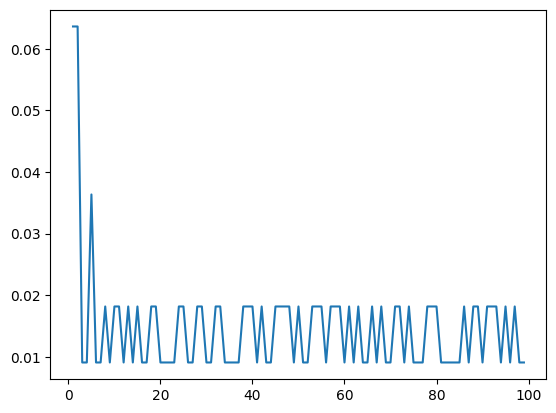

In [50]:
plt.plot(range(1,100), errors)

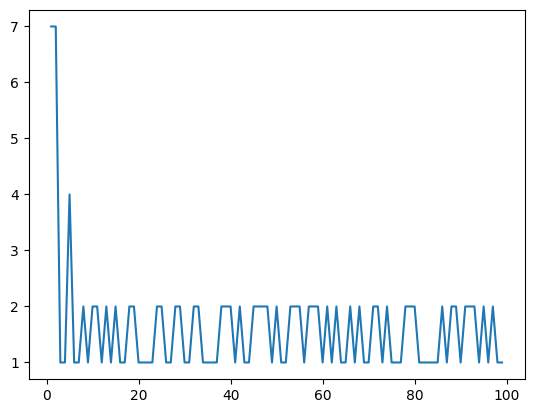

In [51]:
plt.plot(range(1,100), mis_class)